In [7]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('cardio_train.csv', sep = ';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [9]:
df[df.gender == 1].id.count()

45530

In [10]:
df[df.gender == 1].height.describe()
#скорее всего этот сабсет относится к женщинам, но только они какие-то низенькие получились

#судя по минимальному росту (55см), в измерениях присутствуют новорожденные
#кому пришло в голову измерять smoke и cardio - вопрос. видимо, нужно будет фильтровать данные 

count    45530.000000
mean       161.355612
std          7.052726
min         55.000000
25%        157.000000
50%        161.000000
75%        166.000000
max        250.000000
Name: height, dtype: float64

In [11]:
df[df.gender == 1].weight.describe()
#ещё и доволько толстенькие...средний вес 72кг при среднем росте 161 - немного перебор( 
#хотя мб они из-за этого и попали в исследование

count    45530.000000
mean        72.565605
std         14.238838
min         21.000000
25%         63.000000
50%         70.000000
75%         80.000000
max        200.000000
Name: weight, dtype: float64

In [12]:
df[df.gender == 2].id.count()

24470

In [13]:
df[df.gender == 2].height.describe()
#поскольку в данном сабсете рост в среднем больше, то скорее всего он относится к мужчинам

count    24470.000000
mean       169.947895
std          7.228895
min         65.000000
25%        165.000000
50%        170.000000
75%        175.000000
max        207.000000
Name: height, dtype: float64

In [14]:
df[df.gender == 2].weight.describe()

#в этом сабсете тоже присутсвуют какие-то дети - минимальный рост 65см, минимальный вес - 10кг

count    24470.000000
mean        77.257307
std         14.187636
min         10.000000
25%         68.000000
50%         75.000000
75%         85.000000
max        200.000000
Name: weight, dtype: float64

In [15]:
#Таким образом, число женщин - 45530, мужчин - 24470

In [16]:
df['BMI'] = df['weight']/(df['height']*df['height']/10000)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [17]:
df['BMI'].describe()
#судя по распределению, у кого-то есть BMI от 100 до 300, хотя BMI = 50 - уже очень много
#скорее всего опять с данными что-то не то
#и минимальный BMI - 3 (тоже что-то не то)

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: BMI, dtype: float64

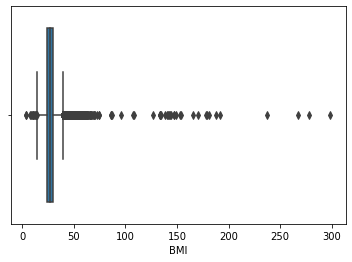

In [18]:
sns.boxplot(df['BMI'])

In [19]:
#Выбросы есть, и с данными что-то не то

In [20]:
df_BMI = df[(df.BMI >= 60)]
df_BMI

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
224,309,21800,2,76,55.0,120,80,1,1,0,0,1,0,95.221607
389,552,16718,2,165,169.0,120,80,1,1,0,0,1,0,62.075298
2458,3470,23646,2,159,165.0,130,70,1,1,0,0,0,0,65.266406
3313,4672,17545,1,155,155.0,160,1000,1,1,0,0,1,1,64.516129
3413,4825,14585,1,159,159.0,100,80,1,1,0,0,1,0,62.893082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64787,92478,23476,1,105,80.0,130,90,1,1,0,0,1,1,72.562358
65302,93223,18467,1,99,60.0,90,60,1,1,0,0,1,0,61.218243
66479,94906,16928,2,110,90.0,110,90,1,1,0,0,1,0,74.380165
66643,95141,18830,1,57,61.0,130,90,1,1,0,0,1,1,187.750077


In [21]:
#сразу видно, что не бывает детей ростом 57 см и весом 61 кг

In [22]:
#судя по таблице, систалическое давление - ap_hi, диастолическое - ap_lo

df_pressure = df[(df.ap_lo <= df.ap_hi)]
df_pressure

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [23]:
(1 - (df_pressure['id'].count())/(df['id'].count()))*100

1.7628571428571438

In [24]:
#То есть у 1.76% людей из таблицы диастолическое давление было выше систалического
#и таким преобразованием мы выкинули все неправильные данные, поскольку диастолическое давление по определению ниже систалического 

In [25]:
df['age'] = (df['age'] / 365).round()
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [26]:
df['age'].describe()
#судя по возрасту, детей в данных нет

count    70000.000000
mean        53.338686
std          6.765294
min         30.000000
25%         48.000000
50%         54.000000
75%         58.000000
max         65.000000
Name: age, dtype: float64

In [27]:
df.groupby(['cholesterol'])['age'].count()

cholesterol
1    52385
2     9549
3     8066
Name: age, dtype: int64

cholesterol
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

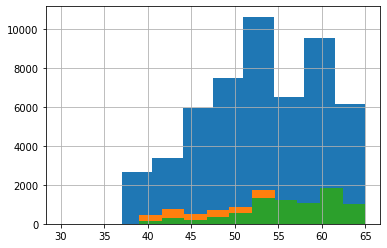

In [28]:
df.groupby(['cholesterol'])['age'].hist()

In [29]:
#немного почищу данные:

In [30]:
df_cleaned = df[(df.height >= 140)][(df.weight >= 40)]
df_cleaned

/home/dasmez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [31]:
df_cleaned['BMI'] = df_cleaned['weight']/(df_cleaned['height']*df_cleaned['height']/10000)

In [32]:
df_cleaned['BMI'].describe()
#уже получше

count    69802.000000
mean        27.473993
std          5.208146
min         13.520822
25%         23.875115
50%         26.370238
75%         30.119402
max         69.827553
Name: BMI, dtype: float64

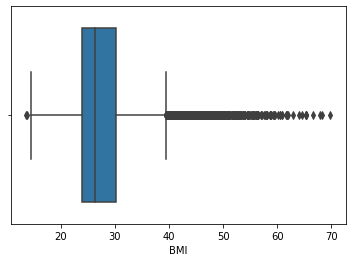

In [33]:
sns.boxplot(df_cleaned['BMI'])
#выбросы всё еще есть

cholesterol
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

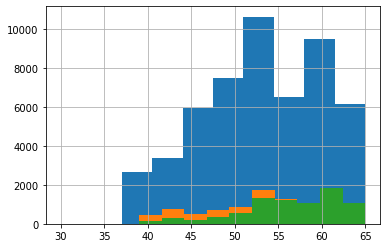

In [34]:
df_cleaned.groupby(['cholesterol'])['age'].hist()

cardio
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: BMI, dtype: object

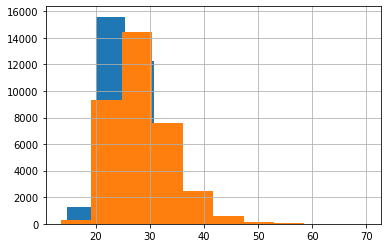

In [63]:
#Рассмотрю, как соотносятся ИМТ и наличие ССЗ:


df_cleaned.groupby('cardio').BMI.hist()

#Видно, что нет различий между уровнем ИМТ между группаси с ССЗ и без них

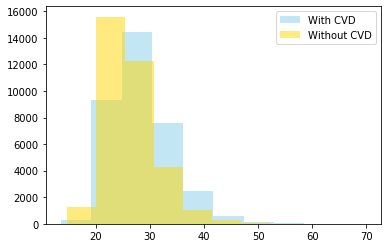

In [89]:
#попробую сделать график красивее (получилось топорно, но как пока умею)

plt.hist(df_cleaned[df_cleaned.cardio == 1].BMI , color="skyblue", label="With CVD", alpha = 0.5)
plt.hist(df_cleaned[df_cleaned.cardio == 0].BMI , color="gold", label="Without CVD", alpha = 0.5)
plt.legend(loc='upper right')